In [4]:
import os
import pandas as pd
import numpy as np
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scikit_posthocs as sp
from matplotlib import rcParams


In [5]:
os.chdir('/fs/ess/PAS0439/MING/virome/checkv_trimmed_for_dowmstream/AMR')

In [6]:
mapping_results = glob.glob('*/*.txt', recursive=True)

In [7]:
metadata = pd.read_csv('../../metadata.csv').drop(['project', 'file_path'], axis = 1)

In [8]:
basepair={}
tmp = pd.read_csv('../ecology/samples_basepair.txt', sep = '\t', header = None)
for index, row in tmp.iterrows():
    basepair[row[0]] = row[1]

In [9]:
abundance = {}
for result in mapping_results:
    sample = result.split('/')[1].split('.txt')[0]
    df = pd.read_csv(result, sep='\t', names = ['votu', sample], skiprows=1)
    abundance[sample] = list(df[sample])
    index = df['votu']


        
        

In [10]:
table_pre = pd.DataFrame.from_dict(abundance)

In [11]:
table_pre.index = index

In [12]:
samples = list(table_pre.columns)

In [14]:
#normalize by sequencing effort
for sample in samples:
    table_pre[sample] = table_pre[sample]/basepair[sample]*1000000000

In [16]:
table_pre

,SRR4435562,SRR4435563,SRR4435572,HS.04,SRR12529324,Yak.AD03,SRR948124,SRR4435558,SRR4435580,SRR12529099,...,SRR11585797,ERR3801459,ERR2530126,SRR6197820,ERR2027901,ERR3275123,ERR3211463,ERR3211473,ERR3275115,SRR11585819
votu,,,,,,,,,,,,,,,,,,,,,
SRR12529380_590248||full,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
SRR12529381_6541||full,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
SRR12529381_382437||full,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
SRR12529378_201484||full,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
SRR12529377_1697565||full,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
SRR948121_214078||full,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.16997,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
ERR3525309_19256||full,0.0,0.0,0.000000,0.31815,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.098416,0.461425,0.0,0.688188,0.0
ERR3275118_99093||full,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
ERR3275131_308415||full,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [26]:
remove = ["ERR3224599_1100574||full", "SRR11784281_383559||full"]
table_pre = table_pre.loc[~table_pre.index.isin(remove), ]

In [27]:
arg_sum = table_pre.sum().reset_index()

In [28]:
arg_sum.rename(columns = {'index':'id', 0:'sum'}, inplace = True)

In [29]:
arg_sum_normalized = arg_sum.copy()

In [30]:
for index, row in arg_sum_normalized.iterrows():
    sample = row['id']
    arg_sum_normalized.loc[index, 'sum'] = arg_sum_normalized.loc[index, 'sum']/basepair[sample]*1000000000

In [31]:
table = pd.merge(metadata, arg_sum_normalized, on = 'id')

In [34]:
table.groupby('beef_or_dairy').describe()

sum                                                    \
               count      mean       std  min  25%       50%       75%   
beef_or_dairy                                                            
beef           455.0  0.024686  0.037424  0.0  0.0  0.015292  0.031264   
dairy          251.0  0.020593  0.064129  0.0  0.0  0.003483  0.023339   
na             269.0  0.037395  0.073283  0.0  0.0  0.002762  0.042223   

                         
                    max  
beef_or_dairy            
beef           0.277293  
dairy          0.922535  
na             0.391836

In [35]:
table.groupby('grazing_or_not').describe()

sum                                                  \
                count      mean      std  min  25%      50%       75%   
grazing_or_not                                                          
na               13.0  0.025856  0.04240  0.0  0.0  0.00000  0.060812   
no              912.0  0.028154  0.05802  0.0  0.0  0.01118  0.031833   
yes              50.0  0.008956  0.02830  0.0  0.0  0.00000  0.000636   

                          
                     max  
grazing_or_not            
na              0.110856  
no              0.922535  
yes             0.178393

In [36]:
table.groupby('geography').describe()

sum                                                         \
            count      mean       std  min       25%       50%       75%   
geography                                                                  
Canada       80.0  0.041280  0.111368  0.0  0.000000  0.000000  0.049457   
China       319.0  0.041169  0.068703  0.0  0.000000  0.018468  0.047144   
India         6.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
Kenya        23.0  0.004669  0.012002  0.0  0.000952  0.002369  0.002900   
New Zeland   33.0  0.011061  0.028651  0.0  0.000522  0.001070  0.001489   
Swedan        6.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
UK          367.0  0.018032  0.015934  0.0  0.005384  0.014991  0.027431   
USA         141.0  0.020812  0.053319  0.0  0.000000  0.000000  0.004537   

                      
                 max  
geography             
Canada      0.922535  
China       0.391836  
India       0.000000  
Kenya       0.059044  
New Zeland  0.110856  
Swedan      0.000000  
UK          0.102695  
USA         0.277293

In [37]:
table.groupby('species').describe()

sum                                               \
                        count      mean       std  min       25%       50%   
species                                                                      
Alces_alces               6.0  0.000000  0.000000  0.0  0.000000  0.000000   
Bison_bison               8.0  0.045357  0.060287  0.0  0.004655  0.025426   
Bos_grunniens            16.0  0.000684  0.001372  0.0  0.000000  0.000106   
Bos_indicus              23.0  0.004669  0.012002  0.0  0.000952  0.002369   
Bos_taurus              729.0  0.023547  0.048368  0.0  0.000000  0.011604   
Bubalus_bubalis           5.0  0.004425  0.007307  0.0  0.000000  0.000308   
Capra_hircus             82.0  0.084631  0.112390  0.0  0.000000  0.034801   
Capreolus_pygargus        5.0  0.000033  0.000075  0.0  0.000000  0.000000   
Cervus_elaphus            5.0  0.000170  0.000379  0.0  0.000000  0.000000   
Hydropotes_inermis        5.0  0.000552  0.000366  0.0  0.000414  0.000676   
Odocoileus_virginianus    7.0  0.001925  0.005094  0.0  0.000000  0.000000   
Ovis_aries               82.0  0.022368  0.026810  0.0  0.000898  0.006334   
Rangifer_tarandus         2.0  0.000000  0.000000  0.0  0.000000  0.000000   

                                            
                             75%       max  
species                                     
Alces_alces             0.000000  0.000000  
Bison_bison             0.058162  0.178393  
Bos_grunniens           0.000454  0.005203  
Bos_indicus             0.002900  0.059044  
Bos_taurus              0.029830  0.922535  
Bubalus_bubalis         0.004851  0.016965  
Capra_hircus            0.166273  0.391836  
Capreolus_pygargus      0.000000  0.000167  
Cervus_elaphus          0.000000  0.000848  
Hydropotes_inermis      0.000696  0.000972  
Odocoileus_virginianus  0.000000  0.013478  
Ovis_aries              0.035871  0.108500  
Rangifer_tarandus       0.000000  0.000000

In [63]:
table.sort_values('sum')
table_filtered = table.loc[~table.index.isin([460]), ]

In [64]:
country = list(table_filtered.groupby('geography').id.count().reset_index().query('id > 50')['geography']) # select country with more than 50 samples

In [65]:
geography_df = table_filtered[table_filtered.geography.isin(country)][['geography', 'sum']]

In [66]:
species = list(table_filtered.groupby('species').id.count().reset_index().query('id > 50')['species'])
species_df = table_filtered[table_filtered.species.isin(species)][['species', 'sum']]
species

['Bos_taurus', 'Capra_hircus', 'Ovis_aries']

In [67]:
table.sort_values('sum')
table_filtered = table.loc[~table.index.isin([460]), ]

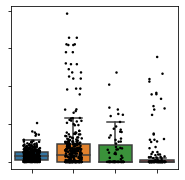

In [68]:
ax = sns.boxplot(x = 'geography', y='sum', data= geography_df, fliersize = 0)
ax = sns.stripplot(x = 'geography', y='sum', data= geography_df, color="black", jitter=0.2, size=2.5)
ax.set(xlabel='', ylabel='', yticklabels='', xticklabels='')
rcParams['figure.figsize'] = 5,3
#plt.savefig('country.svg', facecolor = 'w', edgecolor = 'w')

In [69]:
table.groupby('beef_or_dairy').id.count()

beef_or_dairy
beef     455
dairy    251
na       269
Name: id, dtype: int64

In [70]:
cattle_df = table_filtered[table_filtered.beef_or_dairy.isin(['beef', 'dairy'])][['beef_or_dairy', 'sum']]

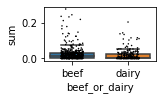

In [102]:
ax = sns.boxplot(x = 'beef_or_dairy', y='sum', data= cattle_df, fliersize = 0)
ax = sns.stripplot(x = 'beef_or_dairy', y='sum', data= cattle_df, color="black", jitter=0.2, size=1.5)
#ax.set(xlabel='', ylabel='', yticklabels='', xticklabels='')
rcParams['figure.figsize'] = 2,1
#plt.savefig('beef_dairy.svg', facecolor = 'w', edgecolor = 'w')

In [99]:
grazing_df = table_filtered[table_filtered.grazing_or_not.isin(['yes', 'no'])][['grazing_or_not', 'sum']]

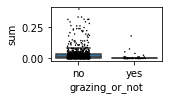

In [103]:
ax = sns.boxplot(x = 'grazing_or_not', y='sum', data= grazing_df, fliersize = 0)
ax = sns.stripplot(x = 'grazing_or_not', y='sum', data= grazing_df, color="black", jitter=0.2, size=1.5)
#ax.set(xlabel='', ylabel='', yticklabels='', xticklabels='')
# figure size in inches
rcParams['figure.figsize'] = 2,1
#ax.set_xticklabels(['non-grazing', 'grazing'])
#plt.savefig('grazing.svg', facecolor = 'w', edgecolor = 'w')

In [47]:
grazing = grazing_df.query('grazing_or_not == "yes"')['sum']
nongrazing = grazing_df.query('grazing_or_not == "no"')['sum']
scipy.stats.kruskal(grazing, nongrazing)

KruskalResult(statistic=30.139356294351717, pvalue=4.0208790645796844e-08)

In [48]:
beef = cattle_df.query('beef_or_dairy == "beef"')['sum']
dairy = cattle_df.query('beef_or_dairy == "dairy"')['sum']
scipy.stats.kruskal(beef, dairy)


KruskalResult(statistic=20.08122119851205, pvalue=7.4221883600344895e-06)

In [49]:
China = geography_df.query('geography == "China"')['sum']
Canada = geography_df.query('geography == "Canada"')['sum']
UK = geography_df.query('geography == "UK"')['sum']
USA = geography_df.query('geography == "USA"')['sum']
scipy.stats.kruskal(China, Canada, UK, USA)

KruskalResult(statistic=73.5488288911665, pvalue=7.414665313001559e-16)

In [239]:
sp.posthoc_dunn(geography_df, group_col = 'geography', val_col = 'sum')

,Canada,China,UK,USA
Canada,1.000000e+00,1.840543e-08,1.708426e-11,3.930864e-02
China,1.840543e-08,1.000000e+00,9.858319e-02,1.054040e-22
UK,1.708426e-11,9.858319e-02,1.000000e+00,1.447756e-29
USA,3.930864e-02,1.054040e-22,1.447756e-29,1.000000e+00
